In [74]:
import pandas as pd
import os
from tqdm import tqdm

In [75]:
def get_frequencies(df, col):
    token_df = df[col].str.split(expand=True).stack().value_counts()

    formal_terms = ["fentanyl", "opioids", "opiates", "morphine", "codeine", "oxycodone", "oxymorphone", "mscontin", "percocet"]
    informal_terms = ["sublimaze", "duragesic", "fentanil", "sufentanil", "fentora", "thebaine", "codiene", "roxanol", "kadian", 
                      "oxycontin", "roxicodone", "roxicet", "endocet", "endocodone", "oxyir", "oxynorm", "hydrocodone", 
                      "vicodin", "fentanylum"] 
    normal_terms = list(set(formal_terms + informal_terms))

    frequencies = {}
    for term in tqdm(normal_terms):
        frequencies[term] = 0
        for token in token_df.index:
            if term in token:
                frequencies[term] += token_df[token]

    return frequencies

In [68]:
oak = os.getenv("OAK")
comment_path = f"{oak}/samori/tiktok/comments/cleaned/comments_5_cleaned.csv"

comments_df = pd.read_csv(comment_path)
comments_df

,create_time,id,like_count,parent_comment_id,reply_count,text,video_id
0,1.698725e+09,7.295967e+18,0.0,7.260153e+18,0,many of them have no idea they are using fenta...,7.260153e+18
1,1.698725e+09,7.295968e+18,0.0,7.260153e+18,0,your children are spiritual warefare!,7.260153e+18
2,1.698725e+09,7.295967e+18,0.0,7.260153e+18,0,i pray they never havevto understand our pain,7.260153e+18
3,1.673466e+09,7.187482e+18,0.0,7.187435e+18,1,"Happy Birthday Jackson, I hope you’re spending...",7.187435e+18
4,1.677084e+09,7.203023e+18,0.0,7.187435e+18,0,I’m so sorry and on his bday. 🥺,7.187435e+18
...,...,...,...,...,...,...,...
390903,1.681443e+09,7.221744e+18,1.0,7.221704e+18,0,amen I'm a recovering addict myself been clean...,7.221704e+18
390904,1.681457e+09,7.221800e+18,0.0,7.221704e+18,0,I love you aunt Tammy!,7.221704e+18
390905,1.681442e+09,7.221737e+18,0.0,7.221704e+18,0,Thank you for speaking up! Even if it saves 1 ...,7.221704e+18
390906,1.681507e+09,7.222017e+18,0.0,7.221704e+18,0,"actively used heroin for 5 years, I got clean ...",7.221704e+18


In [77]:
video_df = pd.read_csv("../all_months.csv")
video_df

,hashtag_names,like_count,music_id,region_code,video_description,view_count,id,username,video_duration,comment_count,create_time,favorites_count,is_stem_verified,share_count,effect_ids,voice_to_text,playlist_id
0,"['forever16', 'fentanylkills', 'forever16❤️🕊']",64,7.311036e+18,us,I wish things were different and i wish you we...,836,7353797018738756906,shelbyws,0,0,1712189315,4,False,0,NaN,NaN,NaN
1,"['duet', 'fyp', '💎', '☠️', 'faafo', '☠️fuck', ...",8,6.893722e+18,us,#duet with @☢️queenjen☢️ #Duet #☠️ OUTLAW❤️‍🔥 ...,195,7353793457980263726,.outlaw.gemz.phq,59,2,1712188486,0,False,0,['8653034'],NaN,NaN
2,"['iloveyou', 'a1day1', 'lovemehateme', 'savage...",11,7.353792e+18,us,#CapCut #a1day1 #forlyfer #iloveyou #😈fiesty😈r...,116,7353791943429770539,king_leosavage91,27,4,1712188141,2,False,3,NaN,NaN,NaN
3,"['chronicpain', 'cpp', 'dpf', 'dontpunishpainr...",186,7.353789e+18,us,#thedoctorpatientforum #dontpunishpainrally #c...,1050,7353788435838012715,ibdgirl76,421,25,1712187317,11,False,8,NaN,NaN,NaN
4,"['funny', 'drama', 'relatable', 'wtf', 'truth'...",20,7.353787e+18,us,I have nothing good to say about this town. #w...,761,7353786844095565099,bossyboss333,32,4,1712186956,1,False,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52042,"['stitch', 'fy', 'fyp', 'androidbaby']",19,7.228283e+18,us,Replying to @percocetbandito0 #stitch #fyp #fy...,633,7228282804432407854,princedrethepresident,9,3,1682965762,0,False,0,NaN,NaN,NaN
52043,"['addicted', 'duet', 'addict', 'recovery', 'gr...",10,7.179352e+18,us,#duet with @officialjellyroll #greenscreen th...,109,7228280706311589166,missieloveseveryone,74,0,1682965277,0,False,1,NaN,NaN,NaN
52044,"['addiction', 'recovery', 'jail', 'fyp', 'tran...",1625,7.228279e+18,us,10 days #fyp #recoverytok #addiction #addictio...,50343,7228279055928315178,hustling_101_,46,88,1682964887,60,False,6,NaN,my lawyers been paid thanks to each and every ...,NaN
52045,"['sober', 'austintx', 'recoveryispossible', 'f...",16,6.701964e+18,us,#austintx #recoveryispossible #fentanylkills #...,285,7228278366548331819,londondorsey_2,30,1,1682964727,1,False,0,['3777750'],NaN,NaN


In [79]:
video_freq = get_frequencies(video_df, col="video_description")

100%|██████████| 28/28 [00:01<00:00, 27.04it/s]


In [85]:
comment_freq = get_frequencies(comments_df, col="text")

100%|██████████| 28/28 [00:01<00:00, 18.14it/s]


In [86]:
normal_terms = list(video_freq.keys())
video_freq = list(video_freq.values())
comment_freq = list(comment_freq.values())

<BarContainer object of 28 artists>

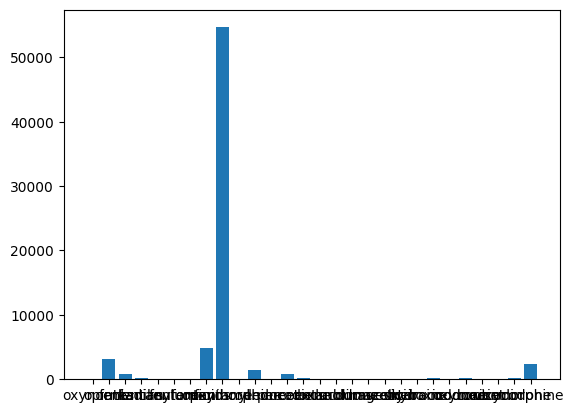

In [88]:
import matplotlib.pyplot as plt
n

plt.bar(normal_terms, video_freq)

<BarContainer object of 28 artists>

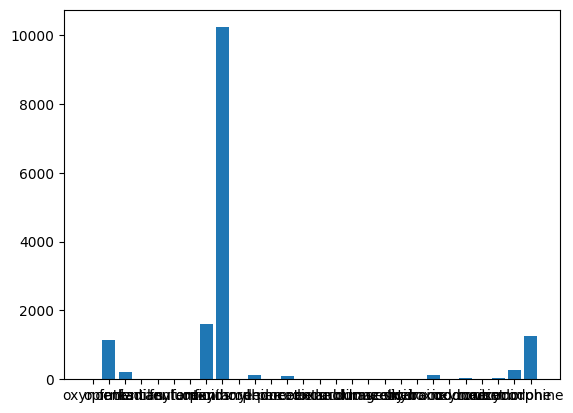

In [89]:
plt.bar(normal_terms, comment_freq)